# Summary:
- Linked nodes, with values and pointers in one (Single-linked-list) or both (Double-linked-list) directions.  
- Useful for dynamic memory allocation (size of input is unknown in advance)  
- Insertion can be faster than with lists, but access to middle of structure can take longer

### Sections
1. Basics
2. Applications
3. Operations (traversal, insertion, deletion)
4. Operational complexity
5. Example: Reverse Linked List
6. Example: Singly-Linked List implementation

### Leetcode summary chapter with practice problems  
https://leetcode.com/explore/learn/card/linked-list/

# Basics:  
### Single-linked-list
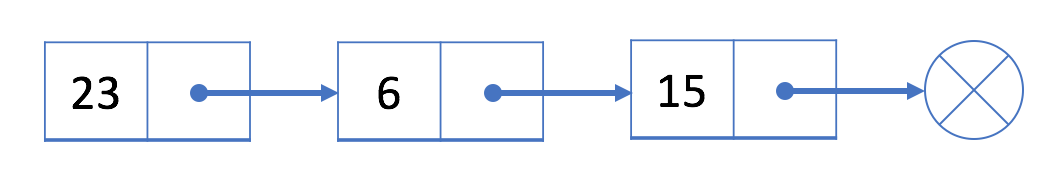

In [ ]:
class MySingleNode(object):
    
    def __init__(self, val, next_node=None):
        self.val = val
        self.next = next_node

### Double-linked-list
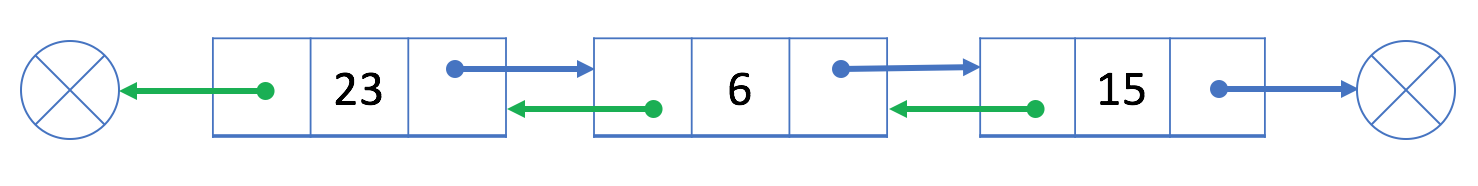

In [ ]:
class MyDoubleNode(object):
    
    def __init__(self, val, next_node=None, prev_node=None):
        self.val = val
        self.next = next_node
        self.prev = prev_node

### Sentinel Nodes  
- Dummy nodes to represent head and/or tail. 
- Make it easier to perform a lot of operations, simplify edge cases
- Don't even have to be nodes! Just have next/prev pointers

# Applications: 
- Implementing stacks, queues, graphs (adjacency list)  
- Python OrderedDict and deque use double-linked lists  
https://github.com/python/cpython/blob/master/Lib/collections/__init__.py  
https://github.com/python/cpython/blob/master/Modules/_collectionsmodule.c  
- Undo functionality (e.g. keep LL of states for Word, Photoshop, or LL of urls for browser back button)
- LRU, LFU caches (see David Starkebaum's code)  
https://github.com/dstarkebaum/leetcode/tree/master/caching  

# Operations (traversal, insertion, deletion):

### Traversal  

In [ ]:
def getNodeAtIndex(index):
    cur = head
    for _ in range(index + 1):
        cur = cur.next
    return cur

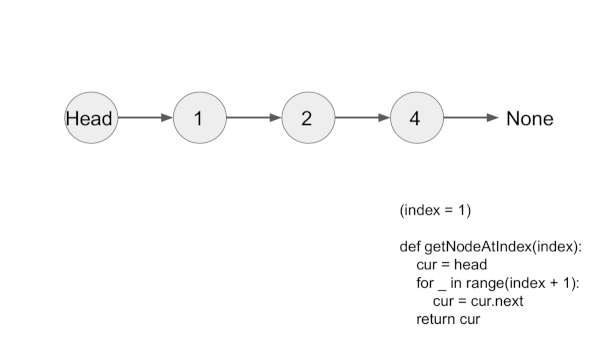

In [ ]:
# Alternative - insert node into sorted list
# Traverse until condition is met
def insertNodeIntoSorted(node):
    # Traversal
    cur = head.next
    prev = head
    while cur and cur.val <= node.val:
        prev = cur
        cur = cur.next
        
    # Insertion (will insert node after prev)
    insertAfterNode(prev, node)

### Insert Node (single)

In [ ]:
def insertSingleNode(val):
    cur = MyNode(val)
    # get previous node
    cur.next = prev.next
    prev.next = cur

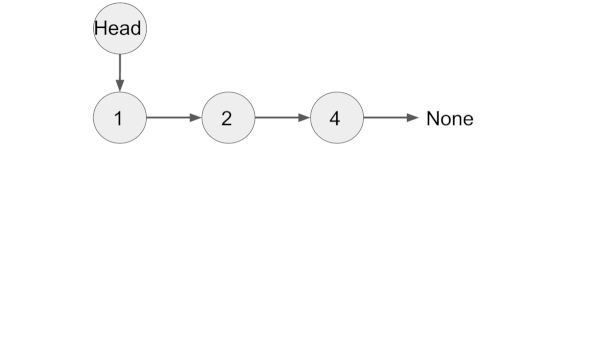

### Insert Node (double)

In [ ]:
def insertDoubleNode(val):
    cur = MyNode(val)
    # get previous node
    cur.next = prev.next
    cur.prev = prev
    prev.next.prev = cur
    prev.next = cur

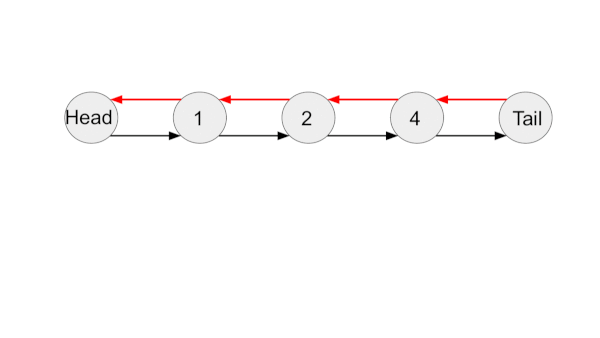

### Delete Node (single)

In [ ]:
def deleteNodeAtIndex(index):
    cur = getNodeAtIndex(index - 1)

    cur.next = cur.next.next

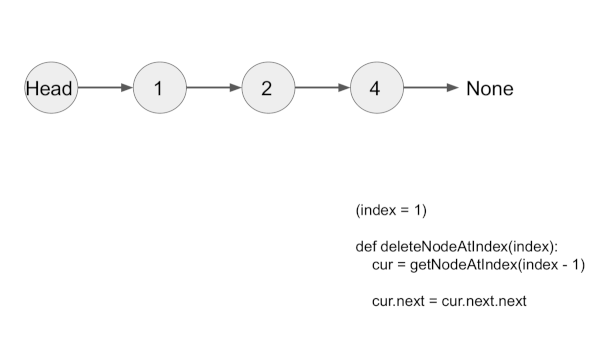

### Delete Node (double)

In [ ]:
def deleteDoubleNodeAtIndex(index):
    cur = getNodeAtIndex(index)

    cur.next.prev = cur.prev
    cur.prev.next = cur.next

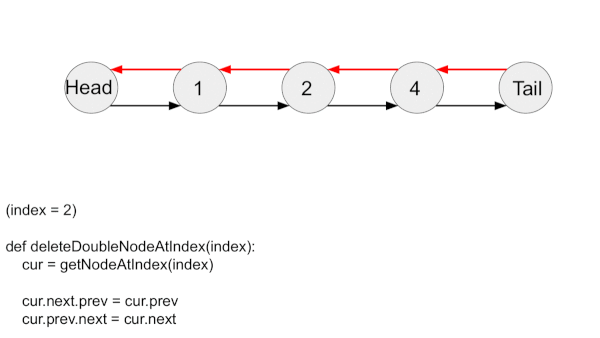

# Operational complexity:  

Function | Singly-linked list |      Doubly-linked list
- | --- | ----
addToHead | O(1) | O(1)
addToTail | O(n) or O(1)? | O(1)
addToIndex(k) | O(k) | O(min(k, n-k))
getValAtIndex(k) | O(k) | O(min(k, n-k))
deleteAtHead | O(1) | O(1)
deleteAtTail | O(n) | O(1)
deleteAtIndex(k) | O(k) | O(min(k, n-k))

# Reverse Linked List  
https://leetcode.com/problems/reverse-linked-list/  
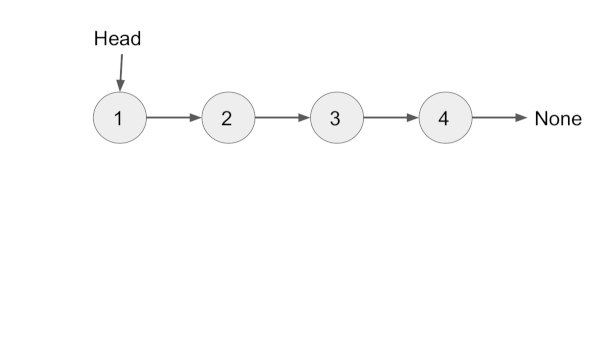

# Single-Linked-List implementation

In [1]:
# From https://leetcode.com/problems/design-linked-list/

class MyNode(object):
    
    def __init__(self, val, next_node=None):
        self.val = val
        self.next = next_node
        

class MyLinkedList(object):

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.head = MyNode('H')
        self.size = 0

    
    def fetchNode(self, index):
        if index > self.size - 1:
            return None

        curr = self.head
        pos = -1
        while pos < index:
            curr = curr.next
            pos += 1

        return curr
        

    def get(self, index):
        """
        Get the value of the index-th node in the linked list. If the index is invalid, return -1.
        :type index: int
        :rtype: int
        """
        node = self.fetchNode(index)
        if not node:
            return -1
        else:
            return node.val
        

    def addAtHead(self, val):
        """
        Add a node of value val before the first element of the linked list. After the insertion, the new node will be the first node of the linked list.
        :type val: int
        :rtype: None
        """
        self.addAtIndex(0, val)
        

    def addAtTail(self, val):
        """
        Append a node of value val to the last element of the linked list.
        :type val: int
        :rtype: None
        """
        self.addAtIndex(self.size, val)
        

    def addAtIndex(self, index, val):
        """
        Add a node of value val before the index-th node in the linked list. If index equals to the length of linked list, the node will be appended to the end of linked list. If index is greater than the length, the node will not be inserted.
        :type index: int
        :type val: int
        :rtype: None
        """
        curr = self.fetchNode(index - 1)
        if curr:
            newNode = MyNode(val)
            newNode.next = curr.next
            curr.next = newNode
            self.size += 1


    def deleteAtIndex(self, index):
        """
        Delete the index-th node in the linked list, if the index is valid.
        :type index: int
        :rtype: None
        """
        curr = self.fetchNode(index - 1)
        
        # Check curr.next in case index was equal to size.
        # - Then curr.next would be None and curr.next.next would error
        if curr and curr.next:
            curr.next = curr.next.next
            self.size -= 1
        

    def printLinkedList(self):
        curr = self.head

        output = ''
        while curr:
            output += '({})-'.format(curr.val)
            curr = curr.next

        output += '(T)'
        print(output)

In [2]:
obj = MyLinkedList()
obj.printLinkedList()

(H)-(T)


In [3]:
obj.addAtHead(1)
obj.printLinkedList()

(H)-(1)-(T)


In [4]:
obj.addAtTail(3)
obj.printLinkedList()

(H)-(1)-(3)-(T)


In [5]:
obj.addAtIndex(1,2)
obj.printLinkedList()

(H)-(1)-(2)-(3)-(T)


In [6]:
print(obj.get(1))
obj.printLinkedList()

2
(H)-(1)-(2)-(3)-(T)


In [7]:
obj.deleteAtIndex(1)
obj.printLinkedList()

(H)-(1)-(3)-(T)


In [8]:
print(obj.get(1))
obj.printLinkedList()

3
(H)-(1)-(3)-(T)
